In [1]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [2]:
dataset_path = '/content/drive/MyDrive/dataset_capstone/train'

In [3]:
datagen = ImageDataGenerator(rescale=0.1,
                             validation_split=0.2)

In [4]:
train_generator = datagen.flow_from_directory(dataset_path,
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')

Found 1871 images belonging to 26 classes.


In [5]:
validation_generator = datagen.flow_from_directory(dataset_path,
                                                   target_size=(64, 64),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 442 images belonging to 26 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.fit(train_generator,
          epochs=10,
          validation_data=validation_generator)


Epoch 1/10
59/59 [==============================] - 1655s 28s/step - loss: 4.4429 - accuracy: 0.1336 - val_loss: 2.6568 - val_accuracy: 0.3145
Epoch 2/10
59/59 [==============================] - 48s 814ms/step - loss: 1.8352 - accuracy: 0.4821 - val_loss: 2.2013 - val_accuracy: 0.4231
Epoch 3/10
59/59 [==============================] - 48s 823ms/step - loss: 0.9751 - accuracy: 0.7296 - val_loss: 2.0233 - val_accuracy: 0.4796
Epoch 4/10
59/59 [==============================] - 47s 796ms/step - loss: 0.6095 - accuracy: 0.8156 - val_loss: 2.1947 - val_accuracy: 0.4842
Epoch 5/10
59/59 [==============================] - 48s 817ms/step - loss: 0.3971 - accuracy: 0.8830 - val_loss: 2.1821 - val_accuracy: 0.5090
Epoch 6/10
59/59 [==============================] - 46s 789ms/step - loss: 0.3328 - accuracy: 0.8985 - val_loss: 2.1632 - val_accuracy: 0.5679
Epoch 7/10
59/59 [==============================] - 49s 828ms/step - loss: 0.2617 - accuracy: 0.9262 - val_loss: 2.1079 - val_accuracy: 0.5294

In [8]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_weights.h5")


In [9]:
from keras.models import model_from_json
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model_weights.h5")

loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
from keras.models import model_from_json
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model_weights.h5")

loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
from keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0

    return img_array


In [14]:

label_map = {i: chr(65 + i) for i in range(26)}

def predict_image(img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = loaded_model.predict(img_array)
    predicted_label_index = np.argmax(predictions, axis=1)[0]
    predicted_abjad = label_map[predicted_label_index]

    return predicted_abjad
img_path = '/content/drive/MyDrive/dataset_capstone/train/B/B_unique_1264.JPG'
predicted_abjad = predict_image(img_path)
print(f"Predicted Abjad: {predicted_abjad}")


1/1 [==============================] - 0s 17ms/step
Predicted Abjad: B


In [19]:
# from keras.models import model_from_json
# import numpy as np
# from keras.preprocessing import image

# with open("model.json", "r") as json_file:
#     loaded_model_json = json_file.read()
# loaded_model = model_from_json(loaded_model_json)

# loaded_model.load_weights("model_weights.h5")

# loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# def load_and_preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(64, 64))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0
#     return img_array

# def predict_letter(model, img_path):
#     img_array = load_and_preprocess_image(img_path)
#     prediction = model.predict(img_array)
#     predicted_class = np.argmax(prediction, axis=1)
#     letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
#     return letters[predicted_class[0]]

# img_path = '/content/drive/MyDrive/dataset_capstone/train/D/D_unique_1913.JPG'
# predicted_letter = predict_letter(loaded_model, img_path)
# print(f"The predicted letter is: {predicted_letter}")


1/1 [==============================] - 0s 66ms/step
The predicted letter is: D


1/1 [==============================] - 0s 296ms/step


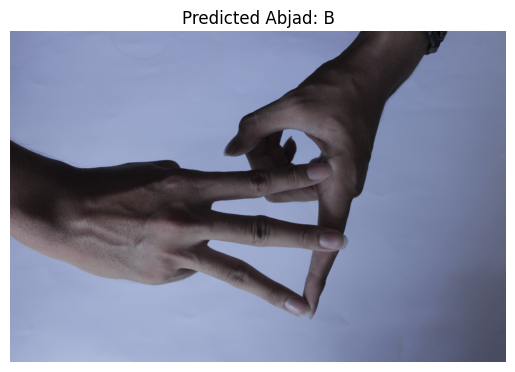

Predicted Abjad: B


In [20]:
# from keras.models import model_from_json
# import numpy as np
# from keras.preprocessing import image
# import matplotlib.pyplot as plt


# with open("model.json", "r") as json_file:
#     loaded_model_json = json_file.read()
# loaded_model = model_from_json(loaded_model_json)


# loaded_model.load_weights("model_weights.h5")


# loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# def load_and_preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(64, 64))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0
#     return img_array

# label_map = {i: chr(65 + i) for i in range(26)}

# def predict_image(img_path):
#     img_array = load_and_preprocess_image(img_path)

#     predictions = loaded_model.predict(img_array)
#     predicted_label_index = np.argmax(predictions, axis=1)[0]

#     predicted_abjad = label_map[predicted_label_index]

#     plt.imshow(image.load_img(img_path))
#     plt.title(f"Predicted Abjad: {predicted_abjad}")
#     plt.axis('off')
#     plt.show()

#     return predicted_abjad

# img_path = '/content/drive/MyDrive/dataset_capstone/train/B/B_unique_1264.JPG'  # Ganti dengan path gambar yang ingin diuji
# predicted_abjad = predict_image(img_path)
# print(f"Predicted Abjad: {predicted_abjad}")


FileUpload(value={}, accept='image/*', description='Upload')

1/1 [==============================] - 0s 59ms/step


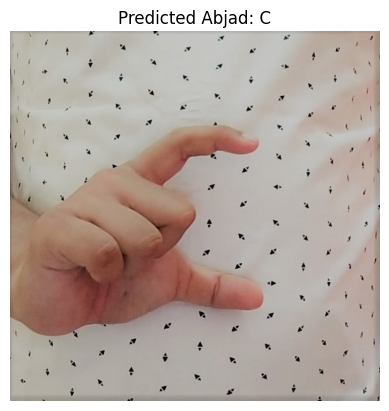

Predicted Abjad: C


In [21]:
from keras.models import model_from_json
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model_weights.h5")

loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def load_and_preprocess_image(img):
    img = image.load_img(img, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

label_map = {i: chr(65 + i) for i in range(26)}

def predict_image(img):
    img_array = load_and_preprocess_image(img)

    predictions = loaded_model.predict(img_array)
    predicted_label_index = np.argmax(predictions, axis=1)[0]

    predicted_abjad = label_map[predicted_label_index]

    plt.imshow(image.load_img(img))
    plt.title(f"Predicted Abjad: {predicted_abjad}")
    plt.axis('off')
    plt.show()

    return predicted_abjad

def on_upload_change(change):
    uploaded_file = list(change['new'].values())[0]
    img_path = uploaded_file['metadata']['name']
    with open(img_path, 'wb') as f:
        f.write(uploaded_file['content'])

    predicted_abjad = predict_image(img_path)
    print(f"Predicted Abjad: {predicted_abjad}")
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
upload_widget.observe(on_upload_change, names='value')
display(upload_widget)
